In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [5]:
audio_file = 'd:/dogs_cats/data/cat_2.wav'
y, sr = librosa.load(audio_file)

print(f"lenght signal {len(y)}")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\seb\AppData\Local\Temp\ipykernel_27568\1380824949.py:1: SyntaxWarning: invalid escape sequence '\d'
  audio_file = 'D:\dogs_cats\data\cat_2.wav'


lenght signal 264600


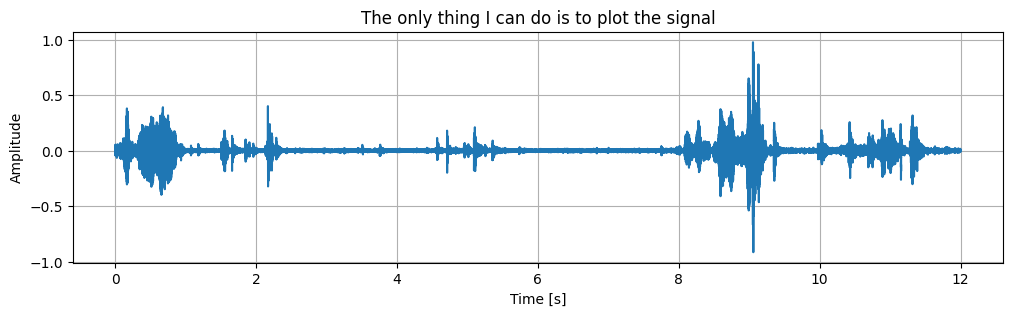

In [6]:
plt.figure(figsize=(12, 3))
plt.plot(np.arange(len(y)) / sr, y)
plt.title('The only thing I can do is to plot the signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [7]:
zcr = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {zcr.shape}")

Zero crossing rate: (1, 517)


In [8]:
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    features = []

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features.extend(np.mean(mfccs, axis=1))  

    features.append(float(np.mean(librosa.feature.rms(y=y))))
    features.append(float(np.mean(librosa.feature.zero_crossing_rate(y))))
    features.append(float(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))))
    features.append(float(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))))
    features.append(float(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))))
    features.append(float(np.mean(librosa.feature.spectral_flatness(y=y))))

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    features.extend(np.mean(chroma, axis=1))

    harmonic = librosa.effects.harmonic(y)
    tonnetz = librosa.feature.tonnetz(y=harmonic, sr=sr)
    features.extend(np.mean(tonnetz, axis=1))

    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features.append(float(tempo))

    return np.array(features)


In [9]:
f = extract_features(audio_file)
    
print(f"RMS shape: {f.shape}")

print(f)

RMS shape: (38,)
[-3.15255249e+02  1.27233467e+02 -1.55618982e+01  2.96188183e+01
 -1.49887669e+00  9.46617508e+00 -6.08083105e+00  2.27051067e+00
 -1.31591558e+00 -2.16894102e+00  1.14915287e+00 -1.87025392e+00
  1.10938132e+00  2.82800440e-02  7.47108091e-02  1.50032133e+03
  1.61533940e+03  3.11396357e+03  2.94914673e-04  4.26232398e-01
  4.15524095e-01  4.55964684e-01  4.24709201e-01  3.86540920e-01
  4.65680212e-01  4.79266346e-01  4.57284629e-01  4.13474232e-01
  4.59731668e-01  7.27713168e-01  5.58050215e-01 -2.26345426e-02
 -5.08681740e-02  4.90231658e-02 -8.19749188e-02 -1.12174025e-03
 -8.37131964e-03  1.29199219e+02]


C:\Users\seb\AppData\Local\Temp\ipykernel_27568\1726695810.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features.append(float(tempo))


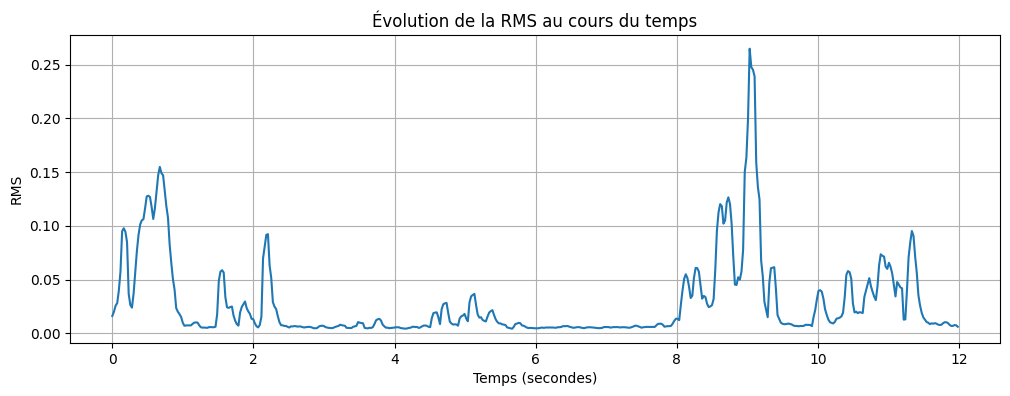

RMS shape: [0.01611441 0.02005943 0.02565137 0.02815247 0.03988842 0.05779507
 0.09494558 0.09770457 0.09442075 0.0847565  0.03674058 0.02635266
 0.02387169 0.03693442 0.05712617 0.07645286 0.09140581 0.10120051
 0.10507493 0.10607155 0.11627333 0.12728362 0.12793422 0.12678052
 0.11750337 0.10637987 0.11635176 0.13214031 0.14705719 0.15479107
 0.14898735 0.1469696  0.13220061 0.11814931 0.10741278 0.08256888
 0.06551905 0.05051229 0.04067551 0.02346658 0.02009637 0.01787075
 0.01520023 0.009936   0.00701847 0.00734267 0.00732143 0.0072935
 0.00737007 0.00879438 0.00994401 0.01007874 0.01002819 0.00753347
 0.00566659 0.00528152 0.00537557 0.00523134 0.00510041 0.00574198
 0.00580013 0.00567089 0.00566411 0.00610607 0.01780427 0.04876616
 0.05733668 0.05872012 0.05652537 0.03377103 0.02421596 0.02361627
 0.02443697 0.02487791 0.01649416 0.01170991 0.00850355 0.00715418
 0.01936871 0.02442777 0.02691797 0.02959884 0.02350491 0.02033759
 0.01804971 0.01351529 0.01328595 0.00929677 0.00660

In [10]:
rms = librosa.feature.rms(y=y)[0]
plt.figure(figsize=(12, 4))
frames = np.arange(len(rms))
t = librosa.frames_to_time(frames, hop_length=512, sr=sr)
plt.plot(t, np.array(rms), label='RMS')
plt.title("Évolution de la RMS au cours du temps")
plt.xlabel("Temps (secondes)")
plt.ylabel("RMS")
plt.grid(True)
plt.show()
print(f"RMS shape: {rms}")

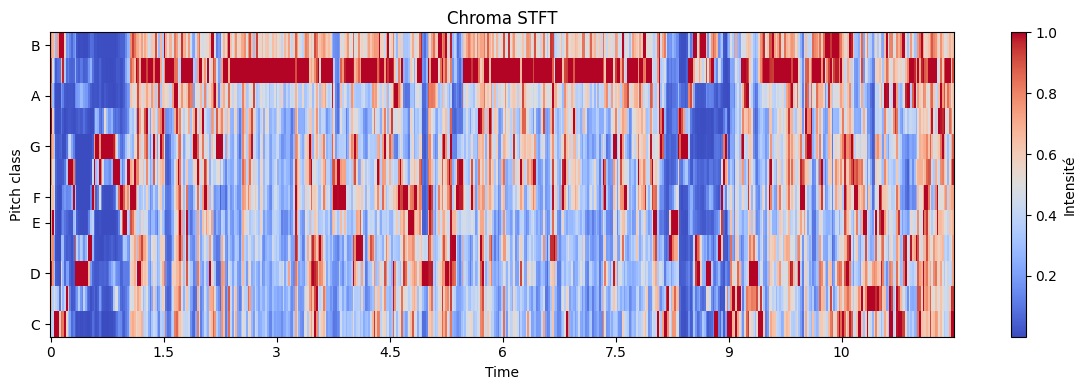

In [11]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sr, cmap='coolwarm')
plt.colorbar(label='Intensité')
plt.title('Chroma STFT')
plt.tight_layout()
plt.show()


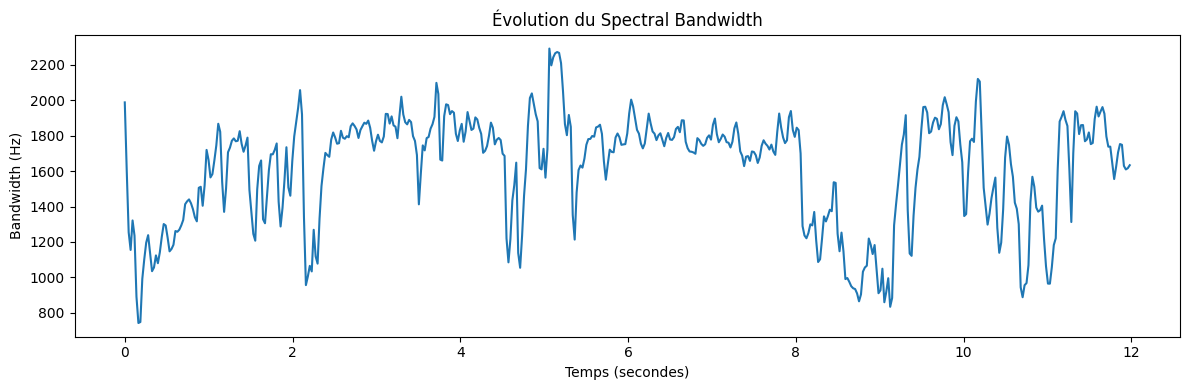

In [12]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]

times = librosa.times_like(spectral_bandwidth, sr=sr, hop_length=512)

plt.figure(figsize=(12, 4))
plt.plot(times, spectral_bandwidth)
plt.title('Évolution du Spectral Bandwidth')
plt.xlabel('Temps (secondes)')
plt.ylabel('Bandwidth (Hz)')
plt.tight_layout()
plt.show()

Valeur moyenne du Spectral Centroid : 1500.32 Hz


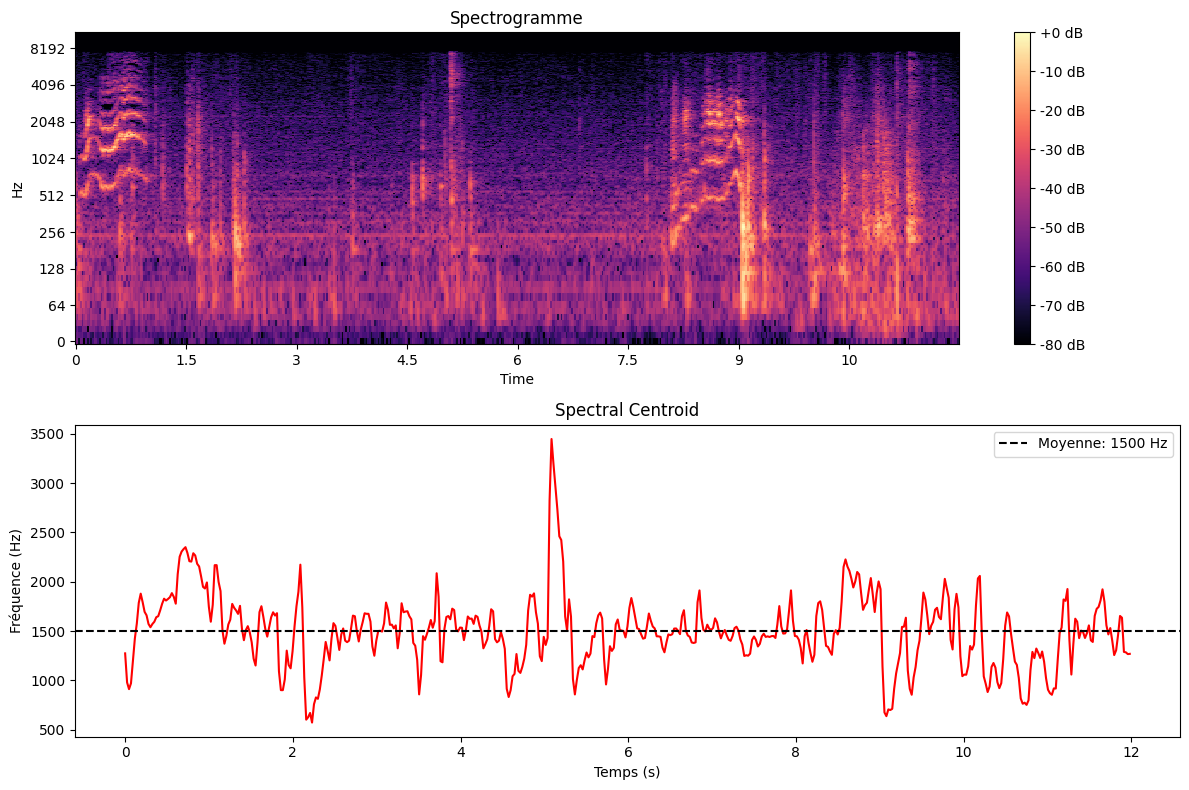

In [13]:
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]


frames = range(len(centroid))
t = librosa.frames_to_time(frames, sr=sr)


print(f"Valeur moyenne du Spectral Centroid : {np.mean(centroid):.2f} Hz")


plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(2, 1, 1)
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme')


plt.subplot(2, 1, 2)
plt.plot(t, centroid, color='r')
plt.axhline(y=np.mean(centroid), color='k', linestyle='--', 
           label=f'Moyenne: {np.mean(centroid):.0f} Hz')
plt.legend()
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.title('Spectral Centroid')

plt.tight_layout()
plt.show()

Spectral Flatness moyenne : 0.00029491467284969985


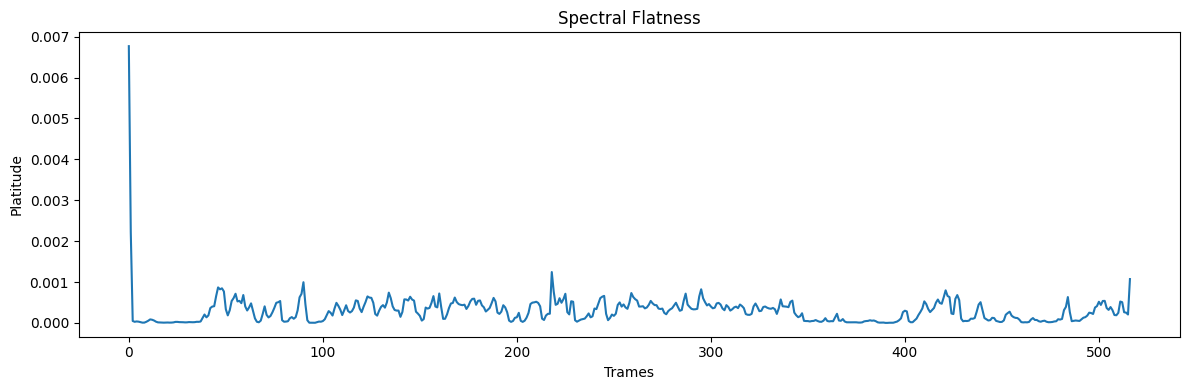

In [14]:
spectral_flatness = librosa.feature.spectral_flatness(y=y)

print(f"Spectral Flatness moyenne : {np.mean(spectral_flatness)}")

plt.figure(figsize=(12, 4))
plt.plot(spectral_flatness[0])
plt.title('Spectral Flatness')
plt.xlabel('Trames')
plt.ylabel('Platitude')
plt.tight_layout()
plt.show()

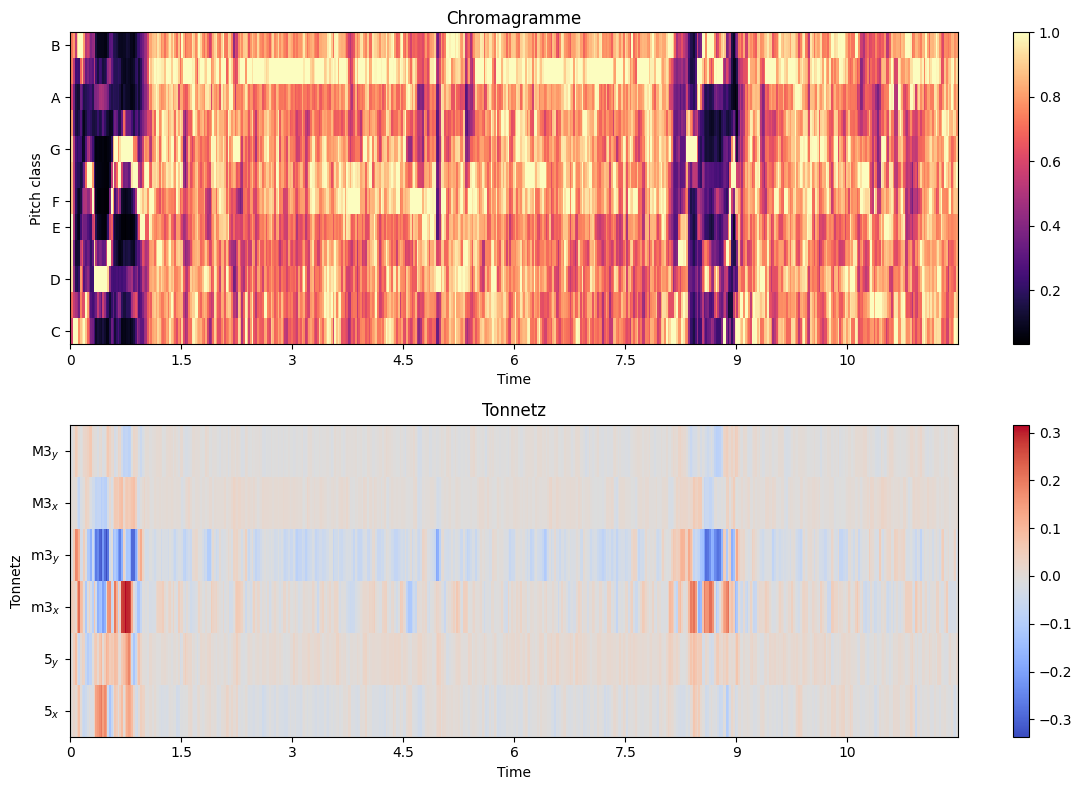

In [15]:

S = np.abs(librosa.stft(y))


chroma = librosa.feature.chroma_stft(S=S, sr=sr)

tonnetz = librosa.feature.tonnetz(y=y, sr=sr, chroma=chroma)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagramme')

plt.subplot(2, 1, 2)
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time')
plt.colorbar()
plt.title('Tonnetz')

plt.tight_layout()
plt.show()


In [35]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Paramètres d'extraction audio
SAMPLE_RATE = 22050
DURATION = 2  # secondes
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION
N_MFCC = 13

# Répertoires
DATA_DIR = "data"
CATEGORIES = ['cats', 'dogs']

def extract_features_from_file(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
    if len(y) < SAMPLES_PER_TRACK:
        padding = SAMPLES_PER_TRACK - len(y)
        y = np.pad(y, (0, padding))
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    return mfcc.T  # (temps, n_mfcc)

def load_dataset(base_dir):
    features = []
    labels = []
    for label_idx, category in enumerate(CATEGORIES):
        category_dir = os.path.join(base_dir, category)
        for file_name in os.listdir(category_dir):
            if file_name.endswith(".wav"):
                file_path = os.path.join(category_dir, file_name)
                mfcc = extract_features_from_file(file_path)
                if mfcc.shape[0] >= 87:
                    mfcc = mfcc[:87]  # on coupe pour uniformiser
                    features.append(mfcc)
                    labels.append(label_idx)
    return np.array(features), np.array(labels)

# Chargement des données
X_train, y_train = load_dataset(os.path.join(DATA_DIR, "train"))
X_test, y_test = load_dataset(os.path.join(DATA_DIR, "test"))

# Mise en forme pour le CNN
X_train = X_train[..., np.newaxis]  # ajout d'une dimension channel
X_test = X_test[..., np.newaxis]

# Construction du modèle CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(87, 13, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test))

# Sauvegarde du modèle
model.save("models/model_cat_dog_audio.h5")

Epoch 1/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4601 - loss: 8.0293 - val_accuracy: 0.8507 - val_loss: 0.4157
Epoch 2/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7103 - loss: 1.1346 - val_accuracy: 0.8507 - val_loss: 0.5278
Epoch 3/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8299 - loss: 0.5024 - val_accuracy: 0.8060 - val_loss: 0.4314
Epoch 4/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8723 - loss: 0.3120 - val_accuracy: 0.9104 - val_loss: 0.3156
Epoch 5/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9192 - loss: 0.2558 - val_accuracy: 0.8507 - val_loss: 0.3333
Epoch 6/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9334 - loss: 0.1999 - val_accuracy: 0.9403 - val_loss: 0.2968


In [20]:
def predict_audio(file_path, model):
    mfcc = extract_features_from_file(file_path)
    if mfcc.shape[0] >= 87:
        mfcc = mfcc[:87]
    else:
        padding = 87 - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, padding), (0, 0)))
    mfcc = mfcc[np.newaxis, ..., np.newaxis]  # batch, time, n_mfcc, channel
    prediction = model.predict(mfcc)
    label = "dog" if prediction[0][0] > 0.5 else "cat"
    confidence = prediction[0][0] if label == "dog" else 1 - prediction[0][0]
    return label, confidence


In [36]:
file = "d:/dogs_cats/data/test/cats/cat_79.wav"  # ou un fichier perso
label, confidence = predict_audio(file, model)
print(f"Prédiction : {label} (confiance : {confidence:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prédiction : cat (confiance : 0.93)
